In [100]:
# Importing all the Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [101]:
#!pip install -U imbalanced-learn

In [102]:
# For loading .arff files
from scipy.io import arff
# To perform mean imputation
from sklearn.preprocessing import Imputer
#To perform kFold Cross Validation
from sklearn.model_selection import KFold
# Formatted counter of class labels
from collections import Counter
# Ordered Dictionary
from collections import OrderedDict
# Library imbalanced-learn to deal with the data imbalance. To use SMOTE oversampling
from imblearn.over_sampling import SMOTE 
# To analyze the type of missing data
import missingno as msno
# Library for performing k-NN and MICE imputations 
import fancyimpute

# To perform mean imputation
from sklearn.preprocessing import Imputer


In [103]:
# Impoting classification models
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB



In [104]:
# Import metrics
import random

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [105]:
# Read the data
bank_data = pd.read_csv("bank_data.csv")

In [106]:
bank_data.shape

(24996, 65)

In [92]:
bank_data.head()
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24996 entries, 0 to 24995
Data columns (total 65 columns):
Attr1     24990 non-null float64
Attr2     24990 non-null float64
Attr3     24990 non-null float64
Attr4     24910 non-null float64
Attr5     24951 non-null float64
Attr6     24990 non-null float64
Attr7     24990 non-null float64
Attr8     24931 non-null float64
Attr9     24988 non-null float64
Attr10    24990 non-null float64
Attr11    24086 non-null float64
Attr12    24910 non-null float64
Attr13    24913 non-null float64
Attr14    24990 non-null float64
Attr15    24968 non-null float64
Attr16    24931 non-null float64
Attr17    24931 non-null float64
Attr18    24990 non-null float64
Attr19    24912 non-null float64
Attr20    24913 non-null float64
Attr21    19595 non-null float64
Attr22    24990 non-null float64
Attr23    24913 non-null float64
Attr24    24495 non-null float64
Attr25    24990 non-null float64
Attr26    24931 non-null float64
Attr27    22269 non-null float64


In [135]:
from feature_selector import FeatureSelector

In [132]:
!pip install wheel http://pythonwheels.com

  Cannot unpack file C:\Users\PRASHA~1\AppData\Local\Temp\pip-unpack-34pf_ki4\pythonwheels.com (downloaded from C:\Users\PRASHA~1\AppData\Local\Temp\pip-req-build-nqf3f818, content-type: text/html); cannot detect archive format
Cannot determine archive format of C:\Users\PRASHA~1\AppData\Local\Temp\pip-req-build-nqf3f818


In [133]:
!pip install lightgbm

In [121]:
!pip install feature_selec

In [93]:
# Convert the Target Variables to Numeric
bank_data["target"] = bank_data["target"].replace({'No':0, 'Yes':1})

In [94]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24996 entries, 0 to 24995
Data columns (total 65 columns):
Attr1     24990 non-null float64
Attr2     24990 non-null float64
Attr3     24990 non-null float64
Attr4     24910 non-null float64
Attr5     24951 non-null float64
Attr6     24990 non-null float64
Attr7     24990 non-null float64
Attr8     24931 non-null float64
Attr9     24988 non-null float64
Attr10    24990 non-null float64
Attr11    24086 non-null float64
Attr12    24910 non-null float64
Attr13    24913 non-null float64
Attr14    24990 non-null float64
Attr15    24968 non-null float64
Attr16    24931 non-null float64
Attr17    24931 non-null float64
Attr18    24990 non-null float64
Attr19    24912 non-null float64
Attr20    24913 non-null float64
Attr21    19595 non-null float64
Attr22    24990 non-null float64
Attr23    24913 non-null float64
Attr24    24495 non-null float64
Attr25    24990 non-null float64
Attr26    24931 non-null float64
Attr27    22269 non-null float64


In [95]:
# Find the Target value distribution
bank_data["target"].value_counts()

0    20830
1     4166
Name: target, dtype: int64

In [96]:
# Missing Data
bank_data.isnull().mean()

Attr1     0.000240
Attr2     0.000240
Attr3     0.000240
Attr4     0.003441
Attr5     0.001800
Attr6     0.000240
Attr7     0.000240
Attr8     0.002600
Attr9     0.000320
Attr10    0.000240
Attr11    0.036406
Attr12    0.003441
Attr13    0.003321
Attr14    0.000240
Attr15    0.001120
Attr16    0.002600
Attr17    0.002600
Attr18    0.000240
Attr19    0.003361
Attr20    0.003321
Attr21    0.216075
Attr22    0.000240
Attr23    0.003321
Attr24    0.020043
Attr25    0.000240
Attr26    0.002600
Attr27    0.109097
Attr28    0.021083
Attr29    0.000240
Attr30    0.003321
            ...   
Attr36    0.000240
Attr37    0.458793
Attr38    0.000240
Attr39    0.003321
Attr40    0.003441
Attr41    0.014682
Attr42    0.003321
Attr43    0.003321
Attr44    0.003321
Attr45    0.070811
Attr46    0.003521
Attr47    0.006801
Attr48    0.000240
Attr49    0.003321
Attr50    0.002600
Attr51    0.000240
Attr52    0.006961
Attr53    0.021083
Attr54    0.021083
Attr55    0.000000
Attr56    0.003321
Attr57    0.

In [97]:

#!pip install fancyimpute 

In [13]:
# The above step shows us that there are a lot of rows which have missing data in at least one of the feature
# missing-data-rows correspond to more than 50% of the entire data.
#  Let us build sparsity Matrix
# To analyze the type of missing data
import missingno as msno
# Library for performing k-NN and MICE imputations 
#import fancyimpute

In [85]:
bank_data.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64',
       'target'],
      dtype='object')

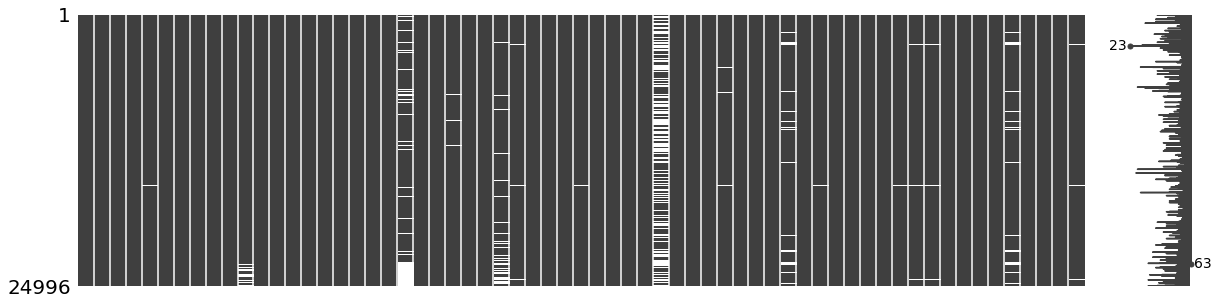

In [86]:
missing_data = bank_data.columns[bank_data.isnull().any()].tolist()
msno.matrix(bank_data[missing_data], figsize=(20,5))

In [17]:
#Generate heat map of missing values

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

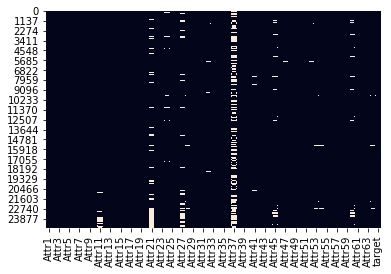

In [18]:
sns.heatmap(bank_data.isnull(), cbar=False)

In [19]:
#  we could notice a lot of sparsity for the featureAttr37 has the highest sparsity among all the features for all the dataframes. The feature Attr21 is sparse for some,

In [ ]:
#Data Imputation
## KNN IMputation
from fancyimpute import KNN 
bank_data.isnull().sum()


In [98]:
bank_data.shape

(24996, 65)

In [99]:
bank_data = bank_data.drop_duplicates()


<BarContainer object of 65 artists>

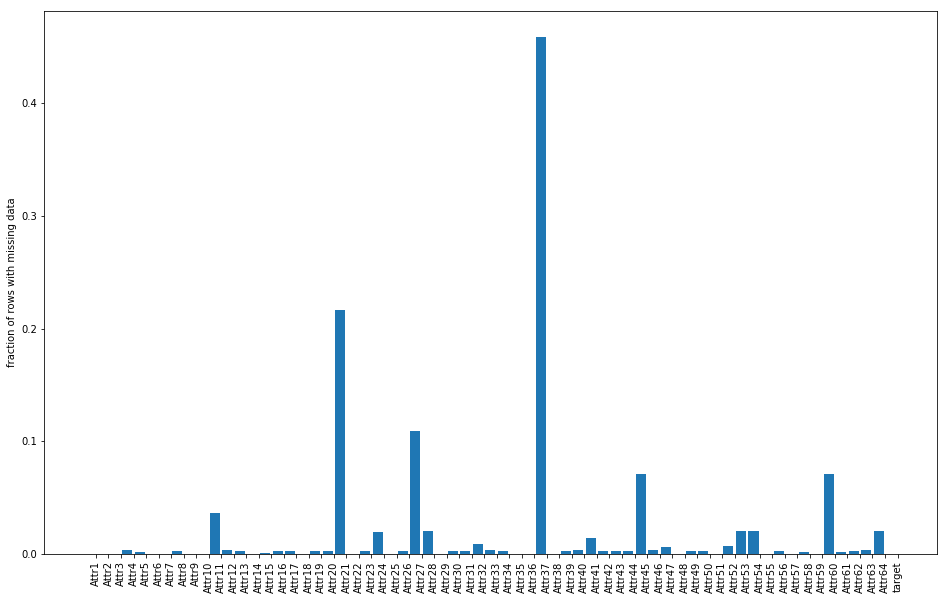

In [20]:
null_counts = bank_data.isnull().sum()/len(bank_data)
plt.figure(figsize=(16,10))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [21]:
# WE noticed that Attr37, Attr21, Attr60 and Attr27m attr45 had majority of missing values

In [22]:
# Data Imputation
# Impute missing values with mean Imputation
from sklearn.preprocessing import Imputer
mean_imputer = Imputer(strategy="mean")
bank_data_mean_imputed = bank_data.copy()
bank_data_mean_imputed.iloc[:,0:64] = mean_imputer.fit_transform(bank_data_mean_imputed.iloc[:,0:64])

In [23]:
bank_data_mean_imputed.isnull().sum()

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
Attr6     0
Attr7     0
Attr8     0
Attr9     0
Attr10    0
Attr11    0
Attr12    0
Attr13    0
Attr14    0
Attr15    0
Attr16    0
Attr17    0
Attr18    0
Attr19    0
Attr20    0
Attr21    0
Attr22    0
Attr23    0
Attr24    0
Attr25    0
Attr26    0
Attr27    0
Attr28    0
Attr29    0
Attr30    0
         ..
Attr36    0
Attr37    0
Attr38    0
Attr39    0
Attr40    0
Attr41    0
Attr42    0
Attr43    0
Attr44    0
Attr45    0
Attr46    0
Attr47    0
Attr48    0
Attr49    0
Attr50    0
Attr51    0
Attr52    0
Attr53    0
Attr54    0
Attr55    0
Attr56    0
Attr57    0
Attr58    0
Attr59    0
Attr60    0
Attr61    0
Attr62    0
Attr63    0
Attr64    0
target    0
Length: 65, dtype: int64

In [24]:
bank_data_mean_imputed.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
0,0.036348,0.29370,0.22999,1.95800,49.611,0.323820,0.044336,2.17300,1.0571,0.63820,...,0.054040,0.056955,0.94596,0.084022,4.584600,2.1621,128.140,2.8484,1.2904,0
1,0.032515,0.25971,0.40845,2.57270,-6.682,-0.000148,0.040253,2.85050,2.1327,0.74029,...,0.000329,0.043921,0.98201,0.000000,4.773400,10.3800,44.448,8.2118,6.4267,0
2,0.019116,0.55685,-0.20328,0.56593,-59.719,0.000000,0.019116,0.79581,2.0933,0.44315,...,0.016719,0.043137,0.99131,0.110710,16.497000,15.4440,81.660,4.4698,2.8481,0
3,-0.173850,0.28684,0.20102,1.73250,356.930,0.000000,-0.173850,2.48630,3.0166,0.71316,...,0.178720,-0.243780,0.82306,0.000000,30.168000,51.1950,33.206,10.9920,5.7509,0
4,0.410710,0.14770,0.78015,6.28190,271.120,0.000000,0.534880,5.77040,1.6009,0.85230,...,0.326340,0.481890,0.66935,0.000000,395.932768,5.0324,33.676,10.8390,22.1870,0


In [25]:
# Split the Train and Test Data
from sklearn.model_selection import train_test_split
# Split the data into X and y
X = bank_data_mean_imputed.drop("target", axis=1)
y = bank_data_mean_imputed["target"]

In [26]:
## Split the data into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [27]:
## Print the shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19996, 64)
(5000, 64)
(19996,)
(5000,)


In [28]:
## Scale the numeric attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train.iloc[:,0:64])

X_train.iloc[:,0:64] = scaler.transform(X_train.iloc[:,0:64])
X_test.iloc[:,0:64] = scaler.transform(X_test.iloc[:,0:64])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [29]:
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

          Attr1     Attr2     Attr3     Attr4     Attr5     Attr6     Attr7  \
19783 -0.017426 -0.003401  0.054526 -0.031246  0.004054  0.010617 -0.026576   
387    0.005564 -0.096501  0.081260  0.001345  0.006728  0.056489 -0.003780   
10302  0.050796  0.000705  0.029751 -0.045459  0.003231  0.010617  0.053702   
14443 -0.021285 -0.111793  0.064736  0.028747  0.007832 -0.020862 -0.030811   
10726 -0.001922 -0.017132 -0.027754 -0.052660  0.001777  0.023654 -0.016678   

          Attr8     Attr9    Attr10    ...       Attr55    Attr56    Attr57  \
19783 -0.027297 -0.014251 -0.017813    ...    -0.093464  0.015914 -0.019502   
387   -0.008353 -0.032207  0.005716    ...     0.190747  0.014312  0.005763   
10302 -0.027521  0.007093 -0.018997    ...    -0.085915  0.015594  0.055494   
14443  0.018275 -0.037093  0.013447    ...    -0.092880  0.007312 -0.006194   
10726 -0.026611 -0.031463 -0.015227    ...    -0.127033  0.014751 -0.002059   

         Attr58    Attr59    Attr60    Attr61    A

In [55]:
#Building Models
#Buliding Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_train=lr.fit(X_train, y_train)
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr= lr.predict(X_test)
y_prob_test_lr= lr.predict_proba(X_test)[:,1]
accu_train_lr = accuracy_score(y_true=y_train,y_pred=y_pred_train_lr)
accu_test_lr = accuracy_score(y_true=y_test,y_pred=y_pred_test_lr)
print("Train Logistic Accuracy :",accuracy_score(y_true=y_train,y_pred=y_pred_train_lr))
print("Test Logistic Accuracy :",accuracy_score(y_true=y_test,y_pred=y_pred_test_lr))


Train Logistic Accuracy : 0.8332666533306662
Test Logistic Accuracy : 0.832


In [56]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_lr = confusion_matrix(y_test, y_pred_test_lr)
cr_lr = classification_report(y_test,y_pred_test_lr)
print("\n Confusion matrix \n", confusion_matrix_test_lr)
print("\n Classification report \n", classification_report(y_test,y_pred_test_lr))





 Confusion matrix 
 [[4155   14]
 [ 826    5]]

 Classification report 
              precision    recall  f1-score   support

          0       0.83      1.00      0.91      4169
          1       0.26      0.01      0.01       831

avg / total       0.74      0.83      0.76      5000



In [57]:
Accuracy_Test=(confusion_matrix_test_lr[0,0]+confusion_matrix_test_lr[1,1])/(confusion_matrix_test_lr[0,0]+confusion_matrix_test_lr[0,1]+confusion_matrix_test_lr[1,0]+confusion_matrix_test_lr[1,1])
TNR_Test_lr= confusion_matrix_test_lr[0,0]/(confusion_matrix_test_lr[0,0] +confusion_matrix_test_lr[0,1])
TPR_Test_lr= confusion_matrix_test_lr[1,1]/(confusion_matrix_test_lr[1,0] +confusion_matrix_test_lr[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9966418805468937
Test TPR:  0.006016847172081829
Test Accuracy:  0.832


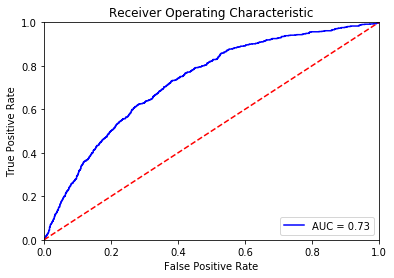

In [58]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_lr)
roc_auc_lr = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [32]:
# Model 2 SVM
from sklearn.svm import SVC
SVC = SVC(probability=True)
model_train_svc=SVC.fit(X_train, y_train)
y_pred_train_svc = SVC.predict(X_train)
y_pred_test_svc = SVC.predict(X_test)


In [33]:
y_prob_test_svc = SVC.predict_proba(X_test)[:,1]

print("Train SVC Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_svc))
print("Test SVC Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_svc))

Train SVC Accuracy: 0.835617123424685
Test SVC Accuracy: 0.8294


In [34]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_svc = confusion_matrix(y_test, y_pred_test_svc)
print("\n Confusion matrix \n", confusion_matrix_test_svc)
print("\n Classification report \n", classification_report(y_test,y_pred_test_svc))



 Confusion matrix 
 [[4146    0]
 [ 853    1]]

 Classification report 
              precision    recall  f1-score   support

          0       0.83      1.00      0.91      4146
          1       1.00      0.00      0.00       854

avg / total       0.86      0.83      0.75      5000



In [36]:
Accuracy_Test=(confusion_matrix_test_svc[0,0]+confusion_matrix_test_svc[1,1])/(confusion_matrix_test_svc[0,0]+confusion_matrix_test_svc[0,1]+confusion_matrix_test_svc[1,0]+confusion_matrix_test_svc[1,1])
TNR_Test= confusion_matrix_test_svc[0,0]/(confusion_matrix_test_svc[0,0] +confusion_matrix_test_svc[0,1])
TPR_Test= confusion_matrix_test_svc[1,1]/(confusion_matrix_test_svc[1,0] +confusion_matrix_test_svc[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  1.0
Test TPR:  0.00117096018735363
Test Accuracy:  0.8294


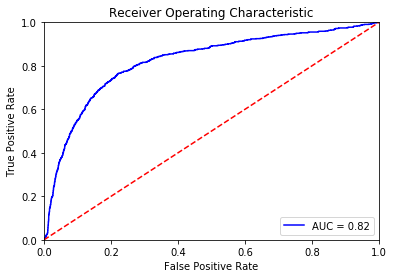

In [39]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_svc)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [81]:
#Building the Decision Tree Model
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_train_dtc = dtc.predict(X_train)
y_pred_test_dtc = dtc.predict(X_test)



In [82]:
y_prob_test_dtc= dtc.predict_proba(X_test)[:,1]

print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_dtc))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_dtc))

Train Decision Tree Accuracy: 1.0
Test Decision Tree Accuracy: 0.9224


In [83]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_dtc = confusion_matrix(y_test, y_pred_test_dtc)
print("\n Confusion matrix \n", confusion_matrix_test_dtc)
print("\n Classification report \n", classification_report(y_test,y_pred_test_dtc))





 Confusion matrix 
 [[3943  177]
 [ 211  669]]

 Classification report 
              precision    recall  f1-score   support

          0       0.95      0.96      0.95      4120
          1       0.79      0.76      0.78       880

avg / total       0.92      0.92      0.92      5000



In [84]:
Accuracy_Test=(confusion_matrix_test_dtc[0,0]+confusion_matrix_test_dtc[1,1])/(confusion_matrix_test_dtc[0,0]+confusion_matrix_test_dtc[0,1]+confusion_matrix_test_dtc[1,0]+confusion_matrix_test_dtc[1,1])
TNR_Test= confusion_matrix_test_dtc[0,0]/(confusion_matrix_test_dtc[0,0] +confusion_matrix_test_dtc[0,1])
TPR_Test= confusion_matrix_test_dtc[1,1]/(confusion_matrix_test_dtc[1,0] +confusion_matrix_test_dtc[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9570388349514564
Test TPR:  0.7602272727272728
Test Accuracy:  0.9224


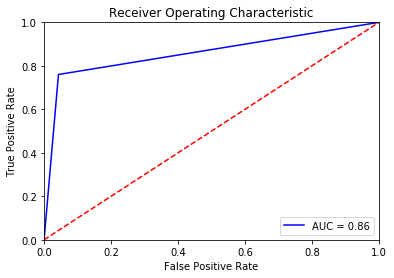

In [85]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_dtc)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [86]:
#Building the RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=40,random_state=0)
model_train_rfc= rfc.fit(X_train,y_train)
y_pred_train_rfc = rfc.predict(X_train)
y_pred_test_rfc = rfc.predict(X_test)


In [46]:
y_prob_test_rfc= dtc.predict_proba(X_test)[:,1]

print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_rfc))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_rfc))

Train Decision Tree Accuracy: 0.9996999399879976
Test Decision Tree Accuracy: 0.9426


In [58]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_rfc = confusion_matrix(y_test, y_pred_test_rfc)
print("\n Confusion matrix \n", confusion_matrix_test_rfc)
print("\n Classification report \n", classification_report(y_test,y_pred_test_rfc))





 Confusion matrix 
 [[4119   27]
 [ 260  594]]

 Classification report 
              precision    recall  f1-score   support

          0       0.94      0.99      0.97      4146
          1       0.96      0.70      0.81       854

avg / total       0.94      0.94      0.94      5000



In [48]:
Accuracy_Test=(confusion_matrix_test_rfc[0,0]+confusion_matrix_test_rfc[1,1])/(confusion_matrix_test_rfc[0,0]+confusion_matrix_test_rfc[0,1]+confusion_matrix_test_rfc[1,0]+confusion_matrix_test_rfc[1,1])
TNR_Test= confusion_matrix_test_rfc[0,0]/(confusion_matrix_test_rfc[0,0] +confusion_matrix_test_rfc[0,1])
TPR_Test= confusion_matrix_test_rfc[1,1]/(confusion_matrix_test_rfc[1,0] +confusion_matrix_test_rfc[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9934876989869754
Test TPR:  0.6955503512880562
Test Accuracy:  0.9426


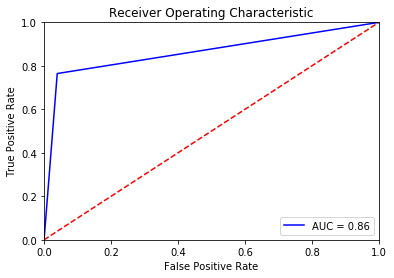

In [49]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_rfc)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
res = pd.DataFrame([y_pred_test_lr,y_pred_test_svc,y_pred_test_dtc,y_pred_test_rfc]).T

In [52]:
res.columns = ['Logistic','SVC','DTC','RFC']
res

,Logistic,SVC,DTC,RFC
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


In [53]:
from scipy.stats import mode

In [54]:
stack = np.array([y_pred_test_lr,y_pred_test_svc,y_pred_test_dtc,y_pred_test_rfc]).T

In [55]:
stacked_pred = mode(stack,axis=1)[0]
stacked_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [57]:
print("Decistion Trees accuracy", accuracy_score(y_test,y_pred_test_dtc))
print("Logistic Regression accuracy", accuracy_score(y_test, y_pred_test_lr))
print("SVC accuracy", accuracy_score(y_test, y_pred_test_svc))
print("RFC Accuracy", accuracy_score(y_test, y_pred_test_rfc))
print("Stacked Accuracy: ", accuracy_score(y_test,stacked_pred))

Decistion Trees accuracy 0.9272
Logistic Regression accuracy 0.8284
SVC accuracy 0.8294
RFC Accuracy 0.9426
Stacked Accuracy:  0.8302


In [33]:
## Model Builsing using Boosing
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=100,
    learning_rate=1)
model_train_ada= ada.fit(X_train,y_train)
y_pred_train_ada = ada.predict(X_train)
y_pred_test_ada = ada.predict(X_test)

In [34]:
y_prob_test_ada= ada.predict_proba(X_test)[:,1]

print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_ada))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_ada))

Train Decision Tree Accuracy: 0.966993398679736
Test Decision Tree Accuracy: 0.954


In [35]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_ada= confusion_matrix(y_test, y_pred_test_ada)
print("\n Confusion matrix \n", confusion_matrix_test_ada)
print("\n Classification report \n", classification_report(y_test,y_pred_test_ada))



 Confusion matrix 
 [[4094   72]
 [ 158  676]]

 Classification report 
              precision    recall  f1-score   support

          0       0.96      0.98      0.97      4166
          1       0.90      0.81      0.85       834

avg / total       0.95      0.95      0.95      5000



In [36]:
Accuracy_Test=(confusion_matrix_test_ada[0,0]+confusion_matrix_test_ada[1,1])/(confusion_matrix_test_ada[0,0]+confusion_matrix_test_ada[0,1]+confusion_matrix_test_ada[1,0]+confusion_matrix_test_ada[1,1])
TNR_Test= confusion_matrix_test_ada[0,0]/(confusion_matrix_test_ada[0,0] +confusion_matrix_test_ada[0,1])
TPR_Test= confusion_matrix_test_ada[1,1]/(confusion_matrix_test_ada[1,0] +confusion_matrix_test_ada[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9827172347575612
Test TPR:  0.8105515587529976
Test Accuracy:  0.954


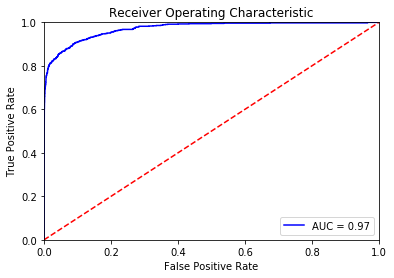

In [37]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_ada)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : [100, 150, 200],
              'learning_rate' : [0.1, 0.5, 0.9]}

Adaboost_model_clf = GridSearchCV(AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=2)), param_grid, n_jobs=-1)

In [ ]:
%time Adaboost_model_clf.fit(X_train, y_train)

In [40]:
# Find best model
final_ada_model = Adaboost_model_clf.best_estimator_
print (Adaboost_model_clf.best_score_, Adaboost_model_clf.best_params_)

0.9521904380876175 {'learning_rate': 0.9, 'n_estimators': 200}


In [44]:
# Build ada model using above Hyper parameters
## Model Builsing using Boosing
from sklearn.ensemble import AdaBoostClassifier
ada_final = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=200,
    learning_rate=0.9)
model_train_ada_final= ada_final.fit(X_train,y_train)
y_pred_train_ada_final = ada_final.predict(X_train)
y_pred_test_ada_final = ada_final.predict(X_test)

In [45]:
y_prob_test_ada_final= ada_final.predict_proba(X_test)[:,1]
acc_train_ada_final = accuracy_score(y_true=y_train,y_pred=y_pred_train_ada_final)
acc_test_ada_final = accuracy_score(y_true=y_test,y_pred=y_pred_test_ada_final)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_ada_final))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_ada_final))

Train Decision Tree Accuracy: 0.9845469093818764
Test Decision Tree Accuracy: 0.9528


In [46]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_ada_final= confusion_matrix(y_test, y_pred_test_ada_final)
print("\n Confusion matrix \n", confusion_matrix_test_ada_final)
print("\n Classification report \n", classification_report(y_test,y_pred_test_ada_final))



 Confusion matrix 
 [[4103   63]
 [ 173  661]]

 Classification report 
              precision    recall  f1-score   support

          0       0.96      0.98      0.97      4166
          1       0.91      0.79      0.85       834

avg / total       0.95      0.95      0.95      5000



In [47]:
Accuracy_Test=(confusion_matrix_test_ada_final[0,0]+confusion_matrix_test_ada_final[1,1])/(confusion_matrix_test_ada_final[0,0]+confusion_matrix_test_ada_final[0,1]+confusion_matrix_test_ada_final[1,0]+confusion_matrix_test_ada_final[1,1])
TNR_Test_ada_final= confusion_matrix_test_ada_final[0,0]/(confusion_matrix_test_ada[0,0] +confusion_matrix_test_ada_final[0,1])
TPR_Test_ada_final= confusion_matrix_test_ada_final[1,1]/(confusion_matrix_test_ada[1,0] +confusion_matrix_test_ada_final[1,1])

print("Test TNR: ",TNR_Test_ada_final)
print("Test TPR: ",TPR_Test_ada_final)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.987009862881886
Test TPR:  0.8070818070818071
Test Accuracy:  0.9528


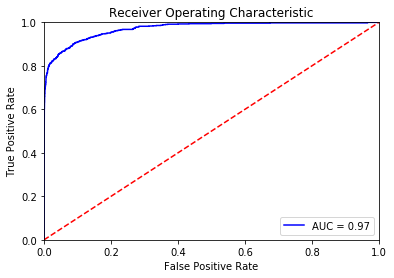

In [48]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_ada)
roc_auc_ada_final = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_ada_final)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [64]:
## Model Building uisng Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbm =  GradientBoostingClassifier(n_estimators=150,
                                        learning_rate=0.1,
                                        subsample=0.8)
model_train_gbm= gbm.fit(X_train,y_train)
y_pred_train_gbm = gbm.predict(X_train)
y_pred_test_gbm = gbm.predict(X_test)

In [65]:
y_prob_test_gbm= gbm.predict_proba(X_test)[:,1]

print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_gbm))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_gbm))

Train Decision Tree Accuracy: 0.957991598319664
Test Decision Tree Accuracy: 0.9474


In [66]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_gbm= confusion_matrix(y_test, y_pred_test_gbm)
print("\n Confusion matrix \n", confusion_matrix_test_gbm)
print("\n Classification report \n", classification_report(y_test,y_pred_test_gbm))


 Confusion matrix 
 [[4102   44]
 [ 219  635]]

 Classification report 
              precision    recall  f1-score   support

          0       0.95      0.99      0.97      4146
          1       0.94      0.74      0.83       854

avg / total       0.95      0.95      0.94      5000



In [67]:
Accuracy_Test=(confusion_matrix_test_gbm[0,0]+confusion_matrix_test_gbm[1,1])/(confusion_matrix_test_gbm[0,0]+confusion_matrix_test_gbm[0,1]+confusion_matrix_test_gbm[1,0]+confusion_matrix_test_gbm[1,1])
TNR_Test= confusion_matrix_test_gbm[0,0]/(confusion_matrix_test_gbm[0,0] +confusion_matrix_test_gbm[0,1])
TPR_Test= confusion_matrix_test_gbm[1,1]/(confusion_matrix_test_gbm[1,0] +confusion_matrix_test_gbm[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.989387361312108
Test TPR:  0.7435597189695551
Test Accuracy:  0.9474


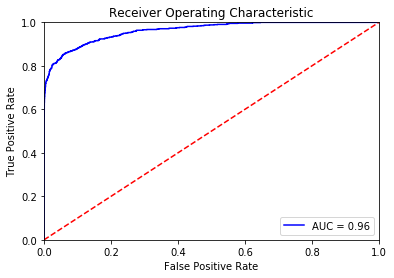

In [68]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_gbm)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [69]:
# Build Model XGBOOST
from xgboost import XGBClassifier
xgb =from imblearn.ensemble import BalancedBaggingClassifier  XGBClassifier()
model_train_xgb= xgb.fit(X_train,y_train)
y_pred_train_xgb = xgb.predict(X_train)
y_pred_test_xgb = xgb.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [70]:
y_prob_test_xgb= xgb.predict_proba(X_test)[:,1]

print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_xgb))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_xgb))

Train Decision Tree Accuracy: 0.9525405081016203
Test Decision Tree Accuracy: 0.9472


In [71]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_xgb= confusion_matrix(y_test, y_pred_test_xgb)
print("\n Confusion matrix \n", confusion_matrix_test_xgb)
print("\n Classification report \n", classification_report(y_test,y_pred_test_xgb))


 Confusion matrix 
 [[4103   43]
 [ 221  633]]

 Classification report 
              precision    recall  f1-score   support

          0       0.95      0.99      0.97      4146
          1       0.94      0.74      0.83       854

avg / total       0.95      0.95      0.94      5000



In [72]:
Accuracy_Test=(confusion_matrix_test_xgb[0,0]+confusion_matrix_test_xgb[1,1])/(confusion_matrix_test_xgb[0,0]+confusion_matrix_test_xgb[0,1]+confusion_matrix_test_xgb[1,0]+confusion_matrix_test_xgb[1,1])
TNR_Test= confusion_matrix_test_xgb[0,0]/(confusion_matrix_test_xgb[0,0] +confusion_matrix_test_xgb[0,1])
TPR_Test= confusion_matrix_test_xgb[1,1]/(confusion_matrix_test_xgb[1,0] +confusion_matrix_test_xgb[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.989387361312108
Test TPR:  0.7435597189695551
Test Accuracy:  0.947010597880424


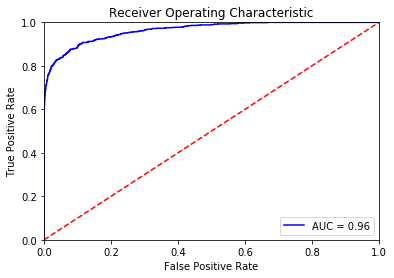

In [73]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_xgb)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [47]:
# Build Model 
from sklearn.ensemble import BalancedBaggingClassifier
from sklearn import tree
bag = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model_train_bag= bag.fit(X_train,y_train)
y_pred_train_bag = bag.predict(X_train)
y_pred_test_bag = bag.predict(X_test)

In [48]:
y_prob_test_bag= bag.predict_proba(X_test)[:,1]

print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_bag))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_bag))

Train Decision Tree Accuracy: 0.8327665533106622
Test Decision Tree Accuracy: 0.8356


In [49]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_bag= confusion_matrix(y_test, y_pred_test_bag)
print("\n Confusion matrix \n", confusion_matrix_test_bag)
print("\n Classification report \n", classification_report(y_test,y_pred_test_bag))


 Confusion matrix 
 [[4178    0]
 [ 822    0]]

 Classification report 
              precision    recall  f1-score   support

         No       0.84      1.00      0.91      4178
        Yes       0.00      0.00      0.00       822

avg / total       0.70      0.84      0.76      5000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
Accuracy_Test=(confusion_matrix_test_bag[0,0]+confusion_matrix_test_bag[1,1])/(confusion_matrix_test_bag[0,0]+confusion_matrix_test_bag[0,1]+confusion_matrix_test_bag[1,0]+confusion_matrix_test_bag[1,1])
TNR_Test= confusion_matrix_test_bag[0,0]/(confusion_matrix_test_bag[0,0] +confusion_matrix_test_bag[0,1])
TPR_Test= confusion_matrix_test_bag[1,1]/(confusion_matrix_test_bag[1,0] +confusion_matrix_test_bag[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  1.0
Test TPR:  0.0
Test Accuracy:  0.8356


In [51]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_bag)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ValueError: Data is not binary and pos_label is not specified

In [34]:
# Build Balanced bagging classifier model
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn import tree
bbc = BalancedBaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model_train_bbc= bbc.fit(X_train,y_train)
y_pred_train_bbc = bbc.predict(X_train)
y_pred_test_bbc = bbc.predict(X_test)

In [37]:
y_prob_test_bbc= bbc.predict_proba(X_test)[:,1]

acc_train_bbc = accuracy_score(y_true=y_train,y_pred=y_pred_train_bbc)
acc_test_bbc = accuracy_score(y_true=y_test,y_pred=y_pred_test_bbc) 

print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_bbc))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_bbc))

Train Decision Tree Accuracy: 0.9470394078815764
Test Decision Tree Accuracy: 0.9056


In [44]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_bbc= confusion_matrix(y_test, y_pred_test_bbc)
cr_bbc=classification_report(y_test,y_pred_test_bbc)
print("\n Confusion matrix \n", confusion_matrix_test_bbc)
print("\n Classification report \n", classification_report(y_test,y_pred_test_bbc))


 Confusion matrix 
 [[3807  362]
 [ 110  721]]

 Classification report 
              precision    recall  f1-score   support

          0       0.97      0.91      0.94      4169
          1       0.67      0.87      0.75       831

avg / total       0.92      0.91      0.91      5000



In [52]:
cr_bbc


'             precision    recall  f1-score   support\n\n          0       0.97      0.91      0.94      4169\n          1       0.67      0.87      0.75       831\n\navg / total       0.92      0.91      0.91      5000\n'

In [39]:
Accuracy_Test=(confusion_matrix_test_bbc[0,0]+confusion_matrix_test_bbc[1,1])/(confusion_matrix_test_bbc[0,0]+confusion_matrix_test_bbc[0,1]+confusion_matrix_test_bbc[1,0]+confusion_matrix_test_bbc[1,1])
TNR_Test_bbc= confusion_matrix_test_bbc[0,0]/(confusion_matrix_test_bbc[0,0] +confusion_matrix_test_bbc[0,1])
TPR_Test_bbc= confusion_matrix_test_bbc[1,1]/(confusion_matrix_test_bbc[1,0] +confusion_matrix_test_bbc[1,1])

print("Test TNR: ",TNR_Test_bbc)
print("Test TPR: ",TPR_Test_bbc)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9131686255696809
Test TPR:  0.8676293622141997
Test Accuracy:  0.9056


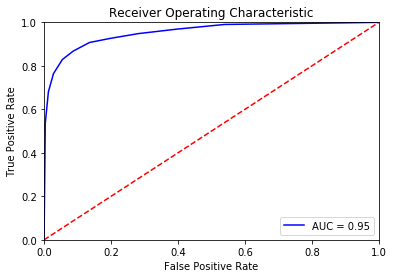

In [40]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_bbc)
roc_auc_bbc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_bbc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [41]:
from prettytable import PrettyTable

ModuleNotFoundError: No module named 'prettytable'

In [42]:
!pip install PrettyTable

  Running setup.py bdist_wheel for PrettyTable: started
  Running setup.py bdist_wheel for PrettyTable: finished with status 'done'
  Stored in directory: C:\Users\Prashanth Yerabati\AppData\Local\pip\Cache\wheels\80\34\1c\3967380d9676d162cb59513bd9dc862d0584e045a162095606
Successfully built PrettyTable


In [43]:
from prettytable import PrettyTable

In [67]:
t = PrettyTable(['Name','Train_accuracy', 'Test_accuracy', 'Roc_Auc', 'Test TNR', 'Test TPR'])
t.add_row(["Logistic Regression",accu_train_lr,accu_test_lr,roc_auc_lr,TNR_Test_lr,TPR_Test_lr])
t.add_row(["Logistic Regression",acc_train_bbc,acc_test_bbc,roc_auc_bbc,TNR_Test_bbc,TPR_Test_bbc])
 

In [68]:
print(t.get_string(title="Results"))

+---------------------+--------------------+---------------+--------------------+--------------------+----------------------+
|         Name        |   Train_accuracy   | Test_accuracy |      Roc_Auc       |      Test TNR      |       Test TPR       |
+---------------------+--------------------+---------------+--------------------+--------------------+----------------------+
| Logistic Regression | 0.8332666533306662 |     0.832     | 0.728490384734729  | 0.9966418805468937 | 0.006016847172081829 |
| Logistic Regression | 0.9470394078815764 |     0.9056    | 0.9534214630420683 | 0.9131686255696809 |  0.8676293622141997  |
+---------------------+--------------------+---------------+--------------------+--------------------+----------------------+


In [70]:
print("\n Classification report bbc \n", classification_report(y_test,y_pred_test_bbc))
print("\n Classification report lr \n", classification_report(y_test,y_pred_test_lr))


 Classification report bbc 
              precision    recall  f1-score   support

          0       0.97      0.91      0.94      4169
          1       0.67      0.87      0.75       831

avg / total       0.92      0.91      0.91      5000


 Classification report lr 
              precision    recall  f1-score   support

          0       0.83      1.00      0.91      4169
          1       0.26      0.01      0.01       831

avg / total       0.74      0.83      0.76      5000

